In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [5]:
#op = pd.read_csv('order_products__train.csv')
#opp = pd.read_csv('order_products__prior.zip')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
tips_tr = pd.read_csv('tip_trainingsdaten.csv')
tips_te = pd.read_csv('tip_testdaten.csv')

In [8]:
tips_tr.head(5)

,Unnamed: 0,order_id,tip
0,0,2539329,1
1,1,2398795,1
2,2,473747,1
3,3,2254736,1
4,4,431534,1


In [9]:
tips_te.head()

,Unnamed: 0,order_id,tip
0,10,1187899,NaN
1,25,1492625,NaN
2,49,2196797,NaN
3,74,525192,NaN
4,78,880375,NaN


In [10]:
tips_tr = tips_tr.drop('Unnamed: 0', axis=1) # Die unnötige Spalte 'Unamed:0' entfernen
tips_te = tips_te.drop('Unnamed: 0', axis=1) # Die unnötige Spalte 'Unamed:0' entfernen

In [11]:
tips_te.head()

,order_id,tip
0,1187899,NaN
1,1492625,NaN
2,2196797,NaN
3,525192,NaN
4,880375,NaN


In [12]:

tips_tr.head()

,order_id,tip
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


In [13]:
instacart_train = tips_tr.merge(orders)
instacart_train.head()

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,prior,1,2,8,NaN
1,2398795,1,1,prior,2,3,7,15.0
2,473747,1,1,prior,3,3,12,21.0
3,2254736,1,1,prior,4,4,7,29.0
4,431534,1,1,prior,5,4,15,28.0


In [15]:
instacart_train.eval_set.value_counts()

prior    3214874
Name: eval_set, dtype: int64

In [19]:
instacart_test = tips_te.merge(orders)
instacart_test.head()

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1187899,NaN,1,train,11,4,8,14.0
1,1492625,NaN,2,train,15,1,11,30.0
2,2196797,NaN,5,train,5,0,11,6.0
3,525192,NaN,7,train,21,2,11,6.0
4,880375,NaN,8,train,4,1,14,10.0


In [20]:
instacart_test.eval_set.value_counts()

train    131209
Name: eval_set, dtype: int64

In [24]:
instacart_test['days_since_prior_order'].isna().sum()


0

# Busines Understanding

# Data Understanding

## Beschreibung der Daten

In [25]:
instacart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 0 to 3214873
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   tip                     int64  
 2   user_id                 int64  
 3   eval_set                object 
 4   order_number            int64  
 5   order_dow               int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 220.7+ MB


In [31]:
print(instacart_train.describe())
instacart_train.head(10)

           order_id           tip       user_id  order_number     order_dow  \
count  3.214874e+06  3.214874e+06  3.214874e+06  3.214874e+06  3.214874e+06   
mean   1.710827e+06  4.217627e-01  1.029701e+05  1.719107e+01  2.776364e+00   
std    9.875206e+05  4.938411e-01  5.953411e+04  1.779950e+01  2.041806e+00   
min    2.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.556832e+05  0.000000e+00  5.138500e+04  5.000000e+00  1.000000e+00   
50%    1.711120e+06  0.000000e+00  1.026620e+05  1.100000e+01  3.000000e+00   
75%    2.566034e+06  1.000000e+00  1.543720e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  1.000000e+00  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.214874e+06            3.008665e+06  
mean        1.344347e+01            1.070724e+01  
std         4.226246e+00            8.954180e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01         

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,prior,1,2,8,NaN
1,2398795,1,1,prior,2,3,7,15.0
2,473747,1,1,prior,3,3,12,21.0
3,2254736,1,1,prior,4,4,7,29.0
4,431534,1,1,prior,5,4,15,28.0
5,3367565,1,1,prior,6,2,7,19.0
6,550135,1,1,prior,7,1,9,20.0
7,3108588,1,1,prior,8,1,14,14.0
8,2295261,1,1,prior,9,1,16,0.0
9,2550362,1,1,prior,10,4,8,30.0


In [29]:
print(departments.describe())
departments.head(10)

       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
print(aisles.describe())
aisles.head(10)

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [ ]:
# DOW zu TIP
# Uhrzeit zu TIP
# Days since prior order zu TIP
# Order Number zu TIP
# Departments zu TIP
# Aisles zu TIP
# Anzahl Produkte in der Bestellung zu TIP

# Top Nutzer nach TIP, Neg Nutzer nach TIP

# Products zu TIP (Top 20?, Neg 20?)

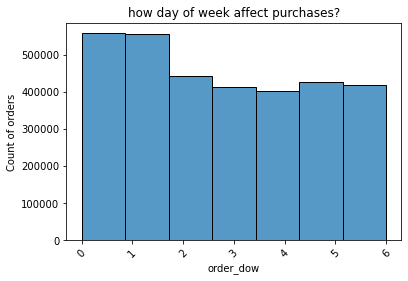

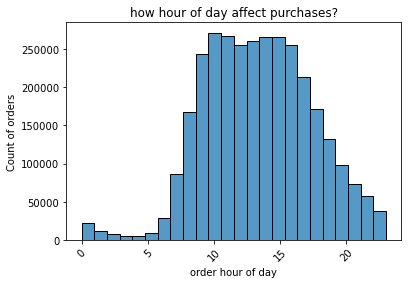

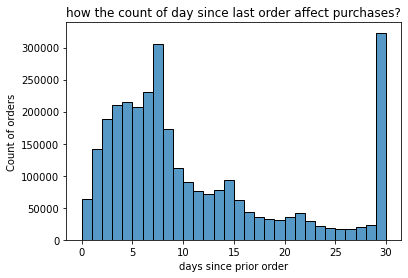

In [39]:
# Histogram for order day of week
sns.histplot(data=instacart_train, x='order_dow', bins=7)
plt.xlabel('order_dow')
plt.ylabel('Count of orders')
plt.title('how day of week affect purchases?')
plt.xticks(rotation= 45)
plt.show()

# Histogram for order hour of day
sns.histplot(data=instacart_train, x='order_hour_of_day', bins=24)
plt.xlabel('order hour of day')
plt.xticks(rotation= 45)
plt.ylabel('Count of orders')
plt.title('how hour of day affect purchases?')
plt.show()

# Histogram for days passed before last order
sns.histplot(data=instacart_train, x='days_since_prior_order', bins=30)
plt.xlabel('days since prior order')
plt.ylabel('Count of orders')
plt.title('how the count of day since last order affect purchases?')
plt.show()

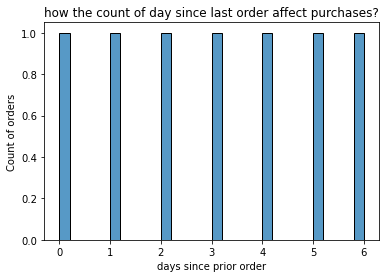

In [41]:
instacart_train.groupby(['order_dow']).agg({'tip':'mean'})

# Histogram for days passed before last order
sns.histplot(data=instacart_train.groupby(['order_dow']).agg({'tip':'mean'}), x='order_dow', bins=30)
plt.xlabel('days since prior order')
plt.ylabel('Count of orders')
plt.title('how the count of day since last order affect purchases?')
plt.show()

- Outlier Detection
- Missing vlaues
    - days_since_prior_oder: Null-Werte behandeln

# Data Preparation

- Feature Engineering
    - Trinkgeld bei der letzten Bestellung
    - Durchschnitt für User
    - Anzahl der Produkte pro Bestellung

- Feature Selection
    - chi2
    - f-Value
    -     - eval_set: Löschen, da kein Zusammenhang mit Zielvariable

- Encoding

# Modeling

# Evaluation